In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## importing the Dataset

In [2]:
dataset = pd.read_csv('Social_Network_Ads.csv')
x = dataset.iloc[:, [2, 3]].values
y = dataset.iloc[:, -1].values

## Splitting the dataset into the traning set and test set

In [3]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.25,random_state=0)

## Feature Scalling

In [4]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

x_train = sc.fit_transform(x_train)
x_test = sc.fit_transform(x_test)

## Tranning the Random Forest Classification

In [5]:
from sklearn.ensemble import RandomForestClassifier
Classifier = RandomForestClassifier(n_estimators = 10, criterion='entropy', random_state=0)
Classifier.fit(x_train, y_train)

RandomForestClassifier(criterion='entropy', n_estimators=10, random_state=0)

## Predicting the Test set result

In [6]:
y_pred = Classifier.predict(x_test)

## Making the Confusion Matrix

In [7]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[63  5]
 [ 5 27]]


## Visualising the Training set result

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


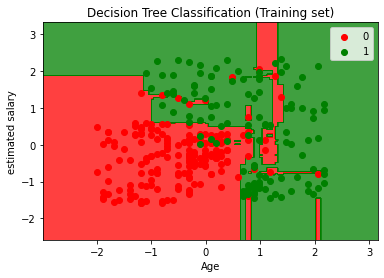

In [8]:
from matplotlib.colors import ListedColormap 
x_set, y_set = x_train, y_train
x1, x2= np.meshgrid(np.arange(start= x_set[:, 0].min() -1, stop = x_set[:, 0].max()+1, step = 0.01), 
                    np.arange(start= x_set[:, 1].min() -1, stop = x_set[:, 1].max()+1, step=0.01))
plt.contourf(x1, x2, Classifier.predict(np.array([x1.ravel(), x2.ravel()]).T).reshape(x1.shape),
             alpha=0.75, cmap = ListedColormap(("red", "green"))) 
plt.xlim(x1.min(), x1.max())
plt.ylim(x2.min(), x2.max())
for i, j in enumerate(np.unique(y_set)): 
    plt.scatter(x_set[y_set == j, 0], x_set[y_set == j, 1],
                c = ListedColormap(("red", "green"))(i), label= j)
plt.title('Decision Tree Classification (Training set)') 
plt.xlabel("Age")
plt.ylabel("estimated salary")
plt.legend() 
plt.show()